<a href="https://colab.research.google.com/github/seoh9510/DKU_RBLNs_Collabo_2024/blob/main/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron

### 텐서플로 임포트하기 + (Added) 사전 함수 정의하기

In [63]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
import cv2
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        if ncols>1:

            axs[i].imshow(images[i])
            label = labels[i].squeeze()
            axs[i].set_title(NAMES[int(label)])
        else:
            axs.imshow(images[i])
            label = labels
            axs.set_title(NAMES[int(label)])

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()


### MNIST 데이터셋 다운로드하고 준비하기

MNIST 데이터세트에는 10개 클래스에 60,000개의 컬러 이미지가 포함되어 있으며 각 클래스에는 6,000개의 이미지가 있습니다. 이 데이터세트는 50,000개의 훈련 이미지와 10,000개의 테스트 이미지로 나뉩니다. 클래스는 상호 배타적이며 서로 겹치지 않습니다.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


### 데이터 확인하기

데이터세트가 올바른지 확인하기 위해 훈련 세트의 처음 25개 이미지를 플로팅하고 각 이미지 아래에 클래스 이름을 표시해 보겠습니다.


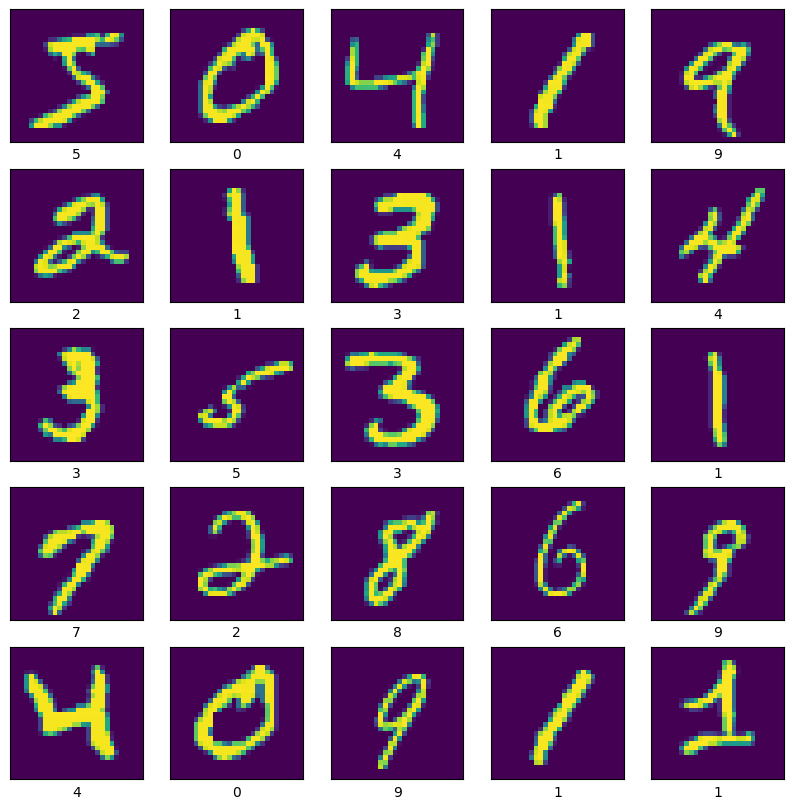

In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### MLP Layer 만들기

In [5]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

지금까지 모델의 아키텍처를 표시해 보겠습니다.

In [7]:
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 633226 (2.42 MB)
Trainable params: 633226 

다음은 모델의 전체 아키텍처입니다.

### 모델 컴파일과 훈련하기

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2065 - accuracy: 0.9377 - val_loss: 0.1473 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1002 - accuracy: 0.9699 - val_loss: 0.0940 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0730 - accuracy: 0.9782 - val_loss: 0.0900 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0984 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0933 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0874 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0816 - val_accuracy

### 모델 평가

313/313 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.9801


[0.1018913984298706, 0.9800999760627747]

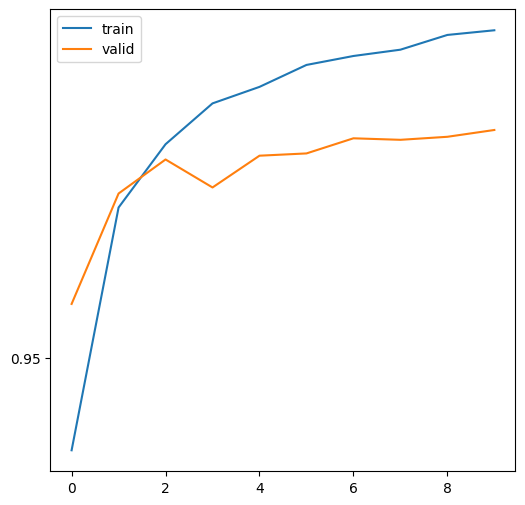

In [10]:
# @title Custom Evaluation

show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 19ms/step
예측 결과 shape: (1, 10)
예측 결과: [[ -8.631011  -13.524164   -2.2211325  -3.8323615  -5.372515  -18.35121
  -41.1686     20.148104  -15.847552    0.6876433]]
예측 클래스 값: [7]


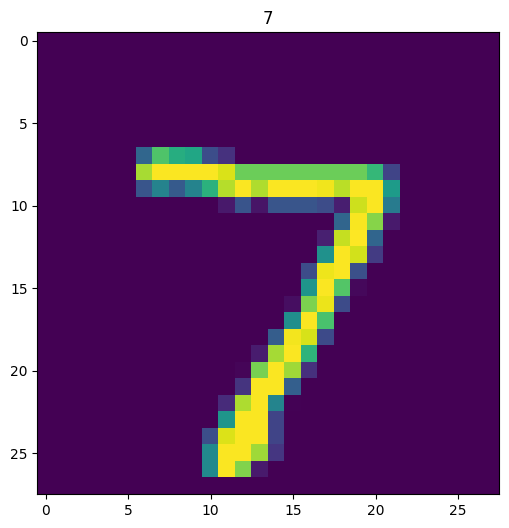

In [67]:
NAMES = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 테스트용 4차원 이미지 배열을 입력해서 predict()수행.
show_images(test_images, test_labels[0], ncols=1)
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

1/1 [==============================] - 0s 17ms/step


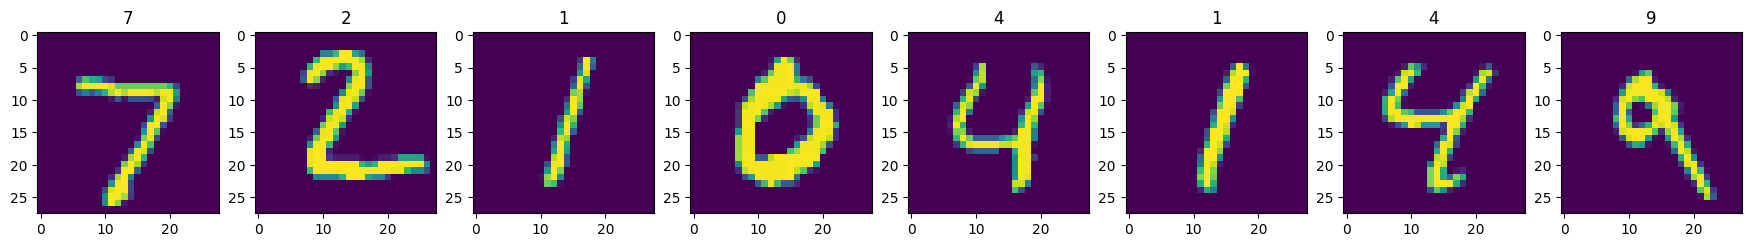

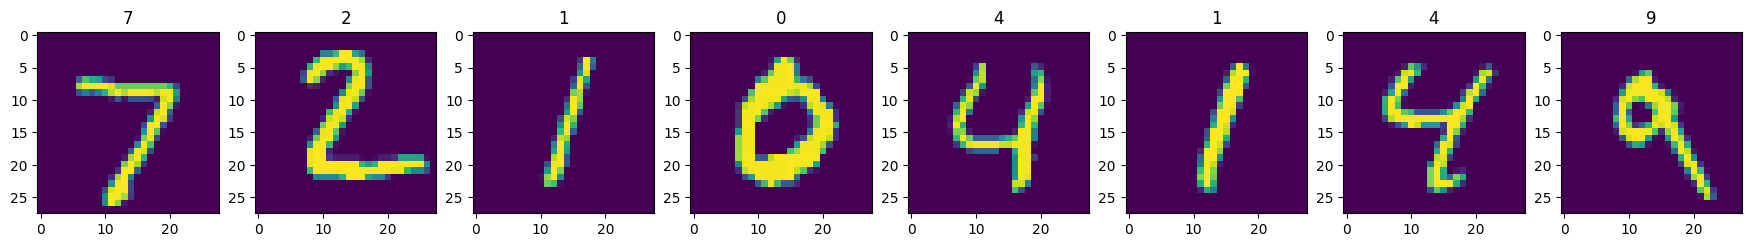

In [64]:
preds = model.predict(test_images[:32], batch_size=32) # 32개 예측
predicted_class = np.argmax(preds, axis=1)

show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)